In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tensorflow-speech-recognition-challenge/link_to_gcp_credits_form.txt
/kaggle/input/tensorflow-speech-recognition-challenge/test.7z
/kaggle/input/tensorflow-speech-recognition-challenge/sample_submission.7z
/kaggle/input/tensorflow-speech-recognition-challenge/train.7z


In [2]:
!pip install pyunpack
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.8 MB/s eta 0:00:00


In [3]:
import os
from pyunpack import Archive
import shutil
if not os.path.exists('/kaggle/working/train/'):
    os.makedirs('/kaggle/working/train/')
Archive('/kaggle/input/tensorflow-speech-recognition-challenge/train.7z').extractall('/kaggle/working/train/')


In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import matplotlib.style as ms

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


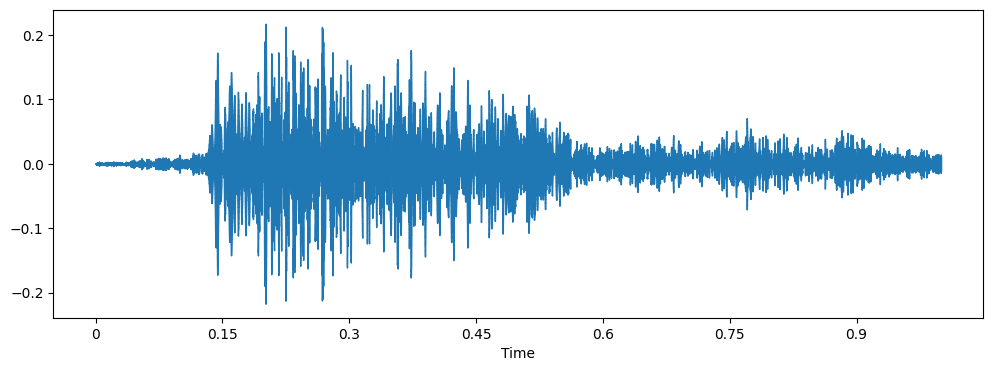

In [5]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sampling_rate)

In [7]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [ 0.00035192  0.00023077  0.0001062  ... -0.0070652  -0.00622757
 -0.00346543]
number of Data :  22050
sampling_rate :  22050


In [8]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/zero/327289eb_nohash_0.wav',sr=None)
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [-0.00024414  0.00042725  0.00094604 ... -0.0005188  -0.00033569
 -0.00106812]
number of Data :  14861
sampling_rate :  16000


In [9]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/zero/b93528e3_nohash_0.wav',sr=8000)
print('Data : ', data)
print('number of Data : ', len(data))
print('sampling_rate : ', sampling_rate)

Data :  [-4.5823297e-04 -6.2076072e-04 -1.9502838e-04 ... -5.1036617e-04
 -4.4072035e-04 -6.5347107e-05]
number of Data :  8000
sampling_rate :  8000


In [10]:
ms.use('seaborn-muted')

/tmp/ipykernel_34/1416757634.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  ms.use('seaborn-muted')


In [11]:
words=os.listdir('/kaggle/working/train/train/audio')
words

['sheila',
 'zero',
 'house',
 'dog',
 'go',
 'on',
 'up',
 'two',
 'down',
 'yes',
 'bird',
 'eight',
 'left',
 'right',
 'three',
 '_background_noise_',
 'no',
 'off',
 'one',
 'seven',
 'five',
 'nine',
 'six',
 'wow',
 'bed',
 'marvin',
 'tree',
 'stop',
 'four',
 'cat',
 'happy']

import matplotlib.pyplot as plt
import numpy as np
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

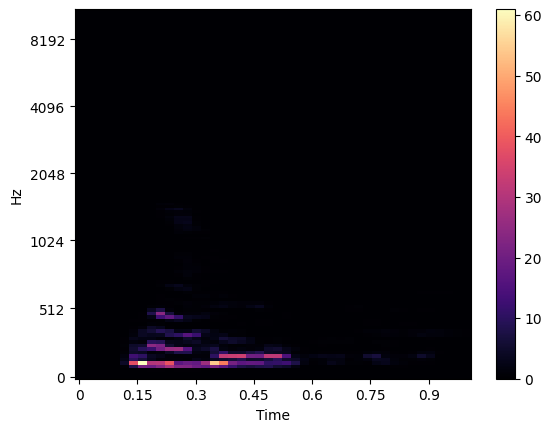

In [15]:
data, sampling_rate = librosa.load('/kaggle/working/train/train/audio/down/3bfd30e6_nohash_3.wav')
melspec=librosa.feature.melspectrogram(y=data,sr=sampling_rate)
plt.figure()
librosa.display.specshow(melspec,y_axis='mel',x_axis='time')
plt.colorbar()

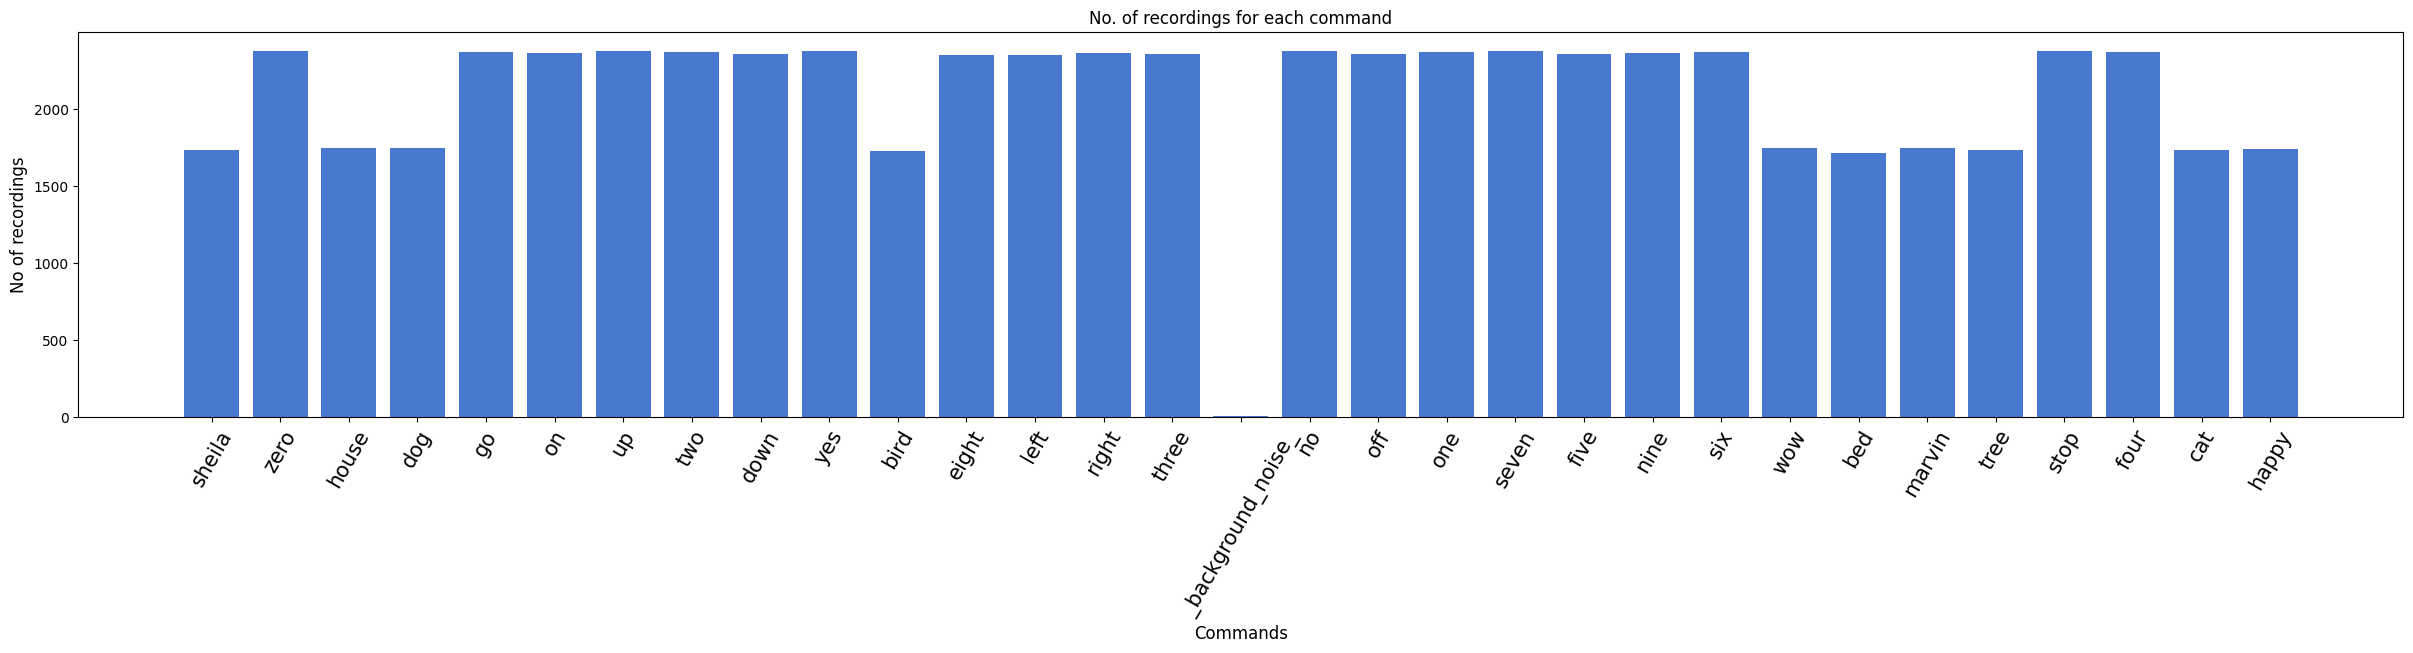

In [17]:
train_audio_path='/kaggle/working/train/train/audio'
labels=os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

In [18]:
all_wave = []
all_label = []

for label in labels[:6]:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)
        #samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

sheila
zero
house
dog
go
on


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

In [22]:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

In [23]:
all_wave

[array([-0.00171621, -0.00288843, -0.00219608, ..., -0.00275325,
        -0.00237327, -0.00271325], dtype=float32),
 array([-0.00022556, -0.00051366, -0.00024466, ..., -0.00034336,
        -0.00065913, -0.00074303], dtype=float32),
 array([-0.00618736, -0.00910952, -0.00811234, ..., -0.01558161,
        -0.01279692, -0.01083311], dtype=float32),
 array([ 0.00159748,  0.00107634,  0.00182655, ..., -0.00176738,
        -0.00133445, -0.001523  ], dtype=float32),
 array([ 1.4793914e-05,  5.8883999e-04, -1.6728055e-04, ...,
         5.1355036e-04,  1.0190689e-03,  8.9526962e-04], dtype=float32),
 array([-5.5924115e-06,  5.0659386e-05,  6.8264635e-05, ...,
         5.3370284e-05,  1.1050023e-04,  1.7466700e-04], dtype=float32),
 array([-0.00147555, -0.01398316, -0.02090225, ..., -0.00852833,
        -0.00650301, -0.00467199], dtype=float32),
 array([-0.00073011, -0.00244321, -0.00204465, ..., -0.00179092,
        -0.00112509, -0.00120294], dtype=float32),
 array([4.4508706e-05, 1.1593310e-04

In [24]:
all_wave = np.array(all_wave).reshape(-1,8000)

In [25]:
all_wave.shape

(11094, 8000)

In [26]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
x_te, x_val, y_te, y_val = train_test_split(x_val,y_val,stratify=y_val,test_size = 0.5,random_state=777,shuffle=True)

In [27]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2662, 8)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 884, 16)          0         
 1D)                                                         

In [29]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 

In [31]:
history=model.fit(x_tr, y_tr ,epochs=20,callbacks=es,  batch_size=32, validation_data=(x_val,y_val))

Epoch 1/20
278/278 [==============================] - 43s 154ms/step - loss: 0.7654 - accuracy: 0.7055 - val_loss: 0.7323 - val_accuracy: 0.7315
Epoch 2/20
278/278 [==============================] - 44s 159ms/step - loss: 0.6528 - accuracy: 0.7634 - val_loss: 0.5541 - val_accuracy: 0.8027
Epoch 3/20
278/278 [==============================] - 43s 155ms/step - loss: 0.5599 - accuracy: 0.8023 - val_loss: 0.4717 - val_accuracy: 0.8360
Epoch 4/20
278/278 [==============================] - 44s 158ms/step - loss: 0.5026 - accuracy: 0.8225 - val_loss: 0.4515 - val_accuracy: 0.8324
Epoch 5/20
278/278 [==============================] - 43s 153ms/step - loss: 0.4805 - accuracy: 0.8282 - val_loss: 0.4454 - val_accuracy: 0.8423
Epoch 6/20
278/278 [==============================] - 45s 161ms/step - loss: 0.4155 - accuracy: 0.8540 - val_loss: 0.4173 - val_accuracy: 0.8604
Epoch 7/20
278/278 [==============================] - 43s 155ms/step - loss: 0.3936 - accuracy: 0.8602 - val_loss: 0.3935 - val_ac

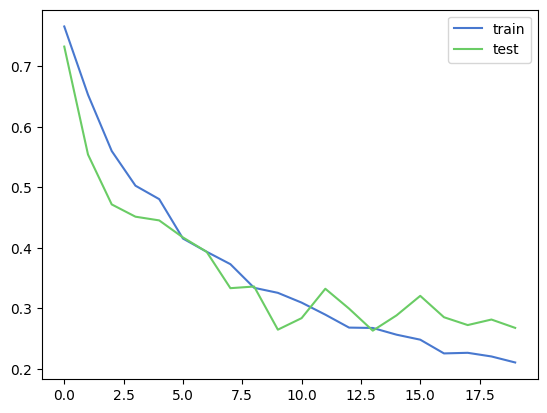

In [32]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

In [49]:
from keras.models import load_model
model.save('best_model.hdf5')

In [50]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000))
    index=np.argmax(prob[0])
    return classes[index]

In [51]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index]
print("Audio:",classes[np.argmax(y_val[index])])
#ipd.Audio(samples, rate=8000)
print("Text:",predict(samples))

Audio: sheila
1/1 [==============================] - 0s 31ms/step
Text: sheila


In [52]:
predictions = model.predict(x=x_te, verbose=0)

In [53]:
print(y_te.shape,predictions.shape)

(1109, 31) (1109, 31)


In [54]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix = confusion_matrix(y_te.argmax(axis=1),predictions.argmax(axis=1))
confusion_matrix
print(classification_report(y_te.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       155
           1       0.81      0.88      0.84       210
           2       0.97      0.90      0.93       156
           3       0.87      0.94      0.91       210
           4       0.95      0.94      0.94       158
           5       0.89      0.91      0.90       220

    accuracy                           0.90      1109
   macro avg       0.91      0.89      0.90      1109
weighted avg       0.90      0.90      0.90      1109



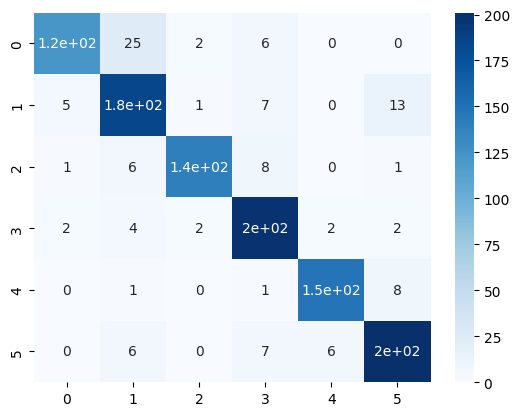

In [55]:
import seaborn as sn

sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()